In [21]:
import import_ipynb
import model

smile_model = model.set_model('smile')
sad_model = model.set_model('sad')
angry_model = model.set_model('angry')
normal_model = model.set_model('normal')

models = [smile_model, sad_model, angry_model, normal_model]
classes = ['smile', 'sad', 'angry', 'normal']

Finish setting the smile_model
Finish setting the sad_model
Finish setting the angry_model
Finish setting the normal_model


smile >> 0.0094
sad >> 2.3363
angry >> 99.1781
normal >> 95.1462

99.1781% angry


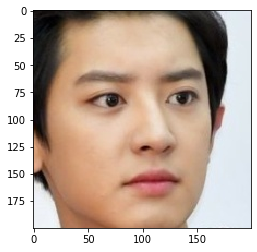

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img/angry.jpg')

b,g,r = cv2.split(img)
ori_img = cv2.merge([r,g,b])

img, face = model.extract_face(img)

score = []
score = model.score_list(face, models)

display_string, heightest_index, heightest_score = model.heightest_score(score)

# print('heightest_index : %0.3f'%heightest_index)
# print('heightest_score : %0.3f'%heightest_score)

i=0
for item in score :
    print("%s >> %0.4f"%(classes[i],(100 * item)))
    i+=1
print()
print(display_string)

plt.imshow(ori_img)
plt.show()

smile >> 0.4378
sad >> 0.3910
angry >> 0.0035
normal >> 97.8963

97.8963% normal


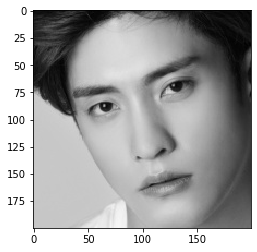

In [28]:
img = cv2.imread('img/normal.jpg')

b,g,r = cv2.split(img)
ori_img = cv2.merge([r,g,b])

img, face = model.extract_face(img)

score = []
score = model.score_list(face, models)

display_string, heightest_index, heightest_score = model.heightest_score(score)

i=0
for item in score :
    print("%s >> %0.4f"%(classes[i],(100 * item)))
    i+=1
print()

print(display_string)

plt.imshow(ori_img)
plt.show()

smile >> 99.7014
sad >> 0.1362
angry >> 0.0012
normal >> 0.2283

99.7014% smile


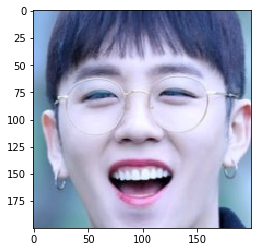

In [40]:
img = cv2.imread('img/smile.jpg')

b,g,r = cv2.split(img)
ori_img = cv2.merge([r,g,b])

img, face = model.extract_face(img)

score = []
score = model.score_list(face, models)

display_string, heightest_index, heightest_score = model.heightest_score(score)

i=0
for item in score :
    print("%s >> %0.4f"%(classes[i],(100 * item)))
    i+=1
print()

print(display_string)

plt.imshow(ori_img)
plt.show()

In [68]:
cap = cv2.VideoCapture(0)

chk_class =[0,0,0,0]

if cap.isOpened():
    while True :
        ret, frame = cap.read()
        
        img, face = model.extract_face(frame)
        score = []
        try :
            score = model.score_list(face, models)
            
            display_string, heightest_index, heightest_score = model.heightest_score(score)
                        
            #print('max score : %0.4f'%heightest_score)
            #print('max index : %d'%heightest_index)
            

            
            #print(display_string)
            
            cv2.putText(img, display_string, (100,120), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 100, 250), 2)
            
            cv2.imshow('face',img)
            if (heightest_index == 0 ) & (chk_class[0] == 0):
                cv2.imwrite(r'C:\Users\Sub\jupyter_workplace\face_emotion\img\mysmile.jpg', img)
                chk_class[0] = 1
            elif (heightest_index == 1) & (chk_class[1] == 0):
                cv2.imwrite(r'C:\Users\Sub\jupyter_workplace\face_emotion\img\mysad.jpg', img)
                chk_class[1] = 1
            elif (heightest_index == 2) & (chk_class[2] == 0):
                cv2.imwrite(r'C:\Users\Sub\jupyter_workplace\face_emotion\img\myangry.jpg', img)
                chk_class[2] = 1
            elif (heightest_index == 3) & (chk_class[3] == 0):
                cv2.imwrite(r'C:\Users\Sub\jupyter_workplace\face_emotion\img\mynormal.jpg', img)
                chk_class[3] = 1
            
        except :
            cv2.putText(img, 'No Face in Camera', (100,120), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 100, 250),1)
            cv2.imshow('face', img)
            
        if cv2.waitKey(1) == 13:
            break
            
        
cap.release()
cv2.destroyAllWindows()
        
    

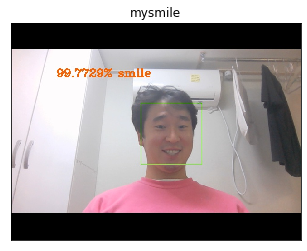

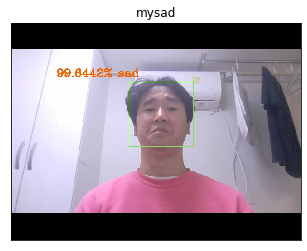

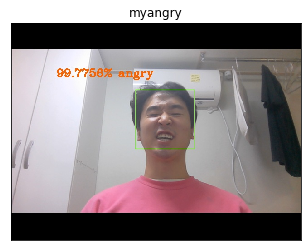

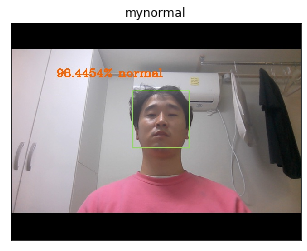

In [69]:
mysmile = cv2.imread('mysmile.jpg')
mysad = cv2.imread('mysad.jpg')
myangry = cv2.imread('myangry.jpg')
mynormal = cv2.imread('mynormal.jpg')

imglist = {'mysmile' : mysmile, 'mysad':mysad, 'myangry':myangry, 'mynormal':mynormal}

for i, (k,v) in enumerate(imglist.items()):
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([]), plt.yticks([])
    plt.show()
